# Arnoldi for eigenvalues

## Convergence on Arnoldi eigenvalues

The convergence of the Ritz values (eigenvalues of $H_n$) to the eigenvalues of  $A$  is very complicated in general. As a rule, though, the iteration tends to find outlying or extreme eigenvalues first, only gradually resolving the interior ones.

Here is a matrix with random eigenvalues of magnitude about 15 or less, plus two prescribed eigenvalues lying a little outside that disk.

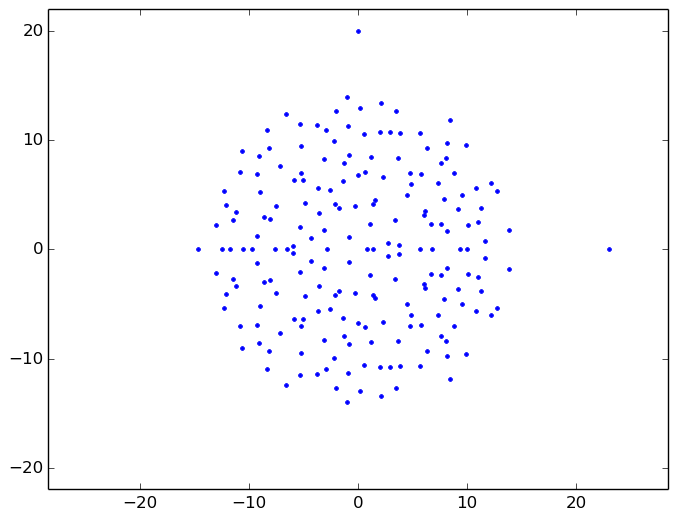

In [14]:
using PyPlot
m = 200;
srand(231)
A = [ randn(m-2,m-2) zeros(m-2,2); zeros(2,m-2) diagm([23,20im]) ];
b = randn(m,1);  b = b/norm(b);
λ = eigvals(A);
plot(real(λ),imag(λ),".");
axis("equal");
axis([-22,22,-22,22]);

Here we compute the Arnolid iteration. Every so often we plot the eigenvalues of $H_n$, plus the "Arnoldi lemniscate" defined as

$$
\left\{z\in\mathbb{C}:\mid p^n(z)\mid =\|p^n(A)\mathbf{b}\|\|\mathbf{b}\|\right\},
$$
 
where $p^n(A)$ is the characteristic polynomial of $H_n$ (and the solution to a minimization problem for $A$ as described in the text). The interior of this curve is more or less what the iteration perceives as the spectrum of $A$.

In [22]:
function arnoldi(A,b,n)
    m = size(A,1);
    Q = zeros(m,n+1);
    H = zeros(n+1,n);
    for j = 1:n
        v = A*Q[:,j];
        for i = 1:j
            H[i,j] = dot(Q[:,i],v);
            v = v - H[i,j]*Q[:,i];
        end
        if j<n
            H[j+1,j] = norm(v);
            if H[j+1,j] == 0
                return Q, H
            end
            Q[:,j+1] = v/H[j+1,j];
        end
    end
end

arnoldi (generic function with 1 method)

In [19]:
m = size(A,1);  n = 50;
Q = zeros(m,n+1);
H = zeros(n+1,n);
Q[:,1] = b/norm(b);
for j = 1:n
    v = A*Q[:,j];
    for i = 1:j
        H[i,j] = dot(Q[:,i],v);
        v = v - H[i,j]*Q[:,i];
    end
    H[j+1,j] = norm(v);
    Q[:,j+1] = v/H[j+1,j];
end

LoadError: LoadError: InexactError()
while loading In[19], in expression starting on line 5

In [23]:
Q,H = arnoldi(A,b,24);

[X,Y] = meshgrid(linspace(-25,25,100));
Z = X + 1i*Y;

plt = 1;
for n = 5:8
    subplot(2,2,plt)
    plot(eig(A),'.')
    axis([-25 25 -25 25]), axis equal
    hold on

    Hn = H(1:n,1:n);
    plot(eig(Hn),'r.')
    pn = poly(Hn);
    c = norm(polyvalm(pn,A)*b);
    W = polyval(pn,Z);
    contour(X,Y,abs(W),c*[1 1])
    title(sprintf('n = %i',n))
    axis off
    plt = plt+1;
end

LoadError: LoadError: syntax: invalid assignment location "[X,Y]"
while loading In[23], in expression starting on line 3